In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import os

In [107]:
def getName(file_path):
    return file_path.split('\\')[-1]

In [108]:
def importDataInfo(path):
    columns = ['Center','Left','Right','Steering','Throttle','Break','Speed']
    data = pd.read_csv(os.path.join(path,'driving_log.csv'), names=columns)

    data['Center'] = data['Center'].apply(getName)
    return data

In [109]:
path = "Simulation Data"
data = importDataInfo(path)

In [110]:
data.head()

,Center,Left,Right,Steering,Throttle,Break,Speed
0,center_2022_03_10_15_03_38_854.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.0,0.0,0.0,0.000007
1,center_2022_03_10_15_03_38_914.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.0,0.0,0.0,0.000012
2,center_2022_03_10_15_03_38_983.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.0,0.0,0.0,0.000007
3,center_2022_03_10_15_03_39_054.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.0,0.0,0.0,0.000015
4,center_2022_03_10_15_03_39_124.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.0,0.0,0.0,0.000011


(array([  45.,  103.,  223.,  396.,  312., 5856.,   90.,   39.,   23.,
          19.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

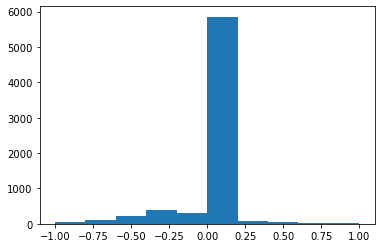

In [111]:
plt.hist(data.Steering)

In [112]:
def balanceData(data, display=True):
    nBins = 31
    samplesPerBin = 1000
    hist, bins = np.histogram(data['Steering'], nBins)
    if display:
        center = (bins[:-1] + bins[1:]) * 0.5
        plt.bar(center, hist, width=0.06)
        plt.plot((-1, 1), (samplesPerBin, samplesPerBin))
        plt.show()

    removeIndexList = []
    for i in range(nBins):
        binDataList = []
        for k in range(len(data['Steering'])):
            if data['Steering'][k] >= bins[i] and data['Steering'][k] <= bins[i+1]:
                binDataList.append(k)
        binDataList = shuffle(binDataList)
        binDataList = binDataList[samplesPerBin:]
        removeIndexList.extend(binDataList)
    data.drop(data.index[removeIndexList],inplace=True)

    if display:
        hist, _ = np.histogram(data['Steering'], nBins)
        plt.bar(center, hist, width=0.06)
        plt.plot((-1, 1), (samplesPerBin, samplesPerBin))
        plt.show()
    return data

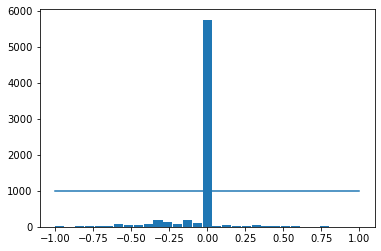

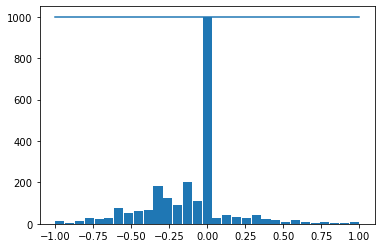

,Center,Left,Right,Steering,Throttle,Break,Speed
3,center_2022_03_10_15_03_39_054.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.00,0.000000,0.0,0.000015
7,center_2022_03_10_15_03_39_335.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.00,0.000000,0.0,0.000017
9,center_2022_03_10_15_03_39_478.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,-0.05,0.073579,0.0,0.046387
10,center_2022_03_10_15_03_39_547.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,-0.20,0.283121,0.0,0.184137
11,center_2022_03_10_15_03_39_618.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,-0.40,0.494913,0.0,0.573817
...,...,...,...,...,...,...,...
7089,center_2022_03_10_15_12_35_308.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.00,0.000000,0.0,28.972180
7090,center_2022_03_10_15_12_35_383.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.00,0.000000,0.0,28.739210
7096,center_2022_03_10_15_12_35_832.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.00,0.000000,0.0,27.435610
7097,center_2022_03_10_15_12_35_907.jpg,D:\pythonProject\Self-Driving-Car\Simulation D...,D:\pythonProject\Self-Driving-Car\Simulation D...,0.00,0.000000,0.0,27.269990


In [113]:
balanceData(data, display=True)

In [114]:
def loadData(path, data):
    imagesPath = []
    steering = []

    for i in range(len(data)):
        indexedData = data.iloc[i]
        imagesPath.append(os.path.join(path,'IMG', indexedData[0]))
        steering.append(float(indexedData[3]))
    imagesPath = np.asarray(imagesPath)
    steering = np.asarray(steering)
    return imagesPath, steering

In [115]:
X,y = loadData(path, data)

In [116]:
X[:5]

array(['Simulation Data\\IMG\\center_2022_03_10_15_03_39_054.jpg',
       'Simulation Data\\IMG\\center_2022_03_10_15_03_39_335.jpg',
       'Simulation Data\\IMG\\center_2022_03_10_15_03_39_478.jpg',
       'Simulation Data\\IMG\\center_2022_03_10_15_03_39_547.jpg',
       'Simulation Data\\IMG\\center_2022_03_10_15_03_39_618.jpg'],
      dtype='<U54')

In [117]:
y[:5]

array([ 0.  ,  0.  , -0.05, -0.2 , -0.4 ])

In [118]:
print(X.shape)
print(y.shape)

(2355,)
(2355,)


In [119]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [120]:
print(X_train.shape)
print(X_test.shape)

(1884,)
(471,)


In [121]:
import matplotlib.image as mpimg

In [122]:
from imgaug import augmenters as iaa
import cv2

In [123]:
def augmentImage(X,y):
    img = mpimg.imread(X)
    ##PAN
    if np.random.rand() <0.5:
        pan = iaa.Affine(translate_percent={'x':(-0.1,0.1),'y':(-0.1,0.1)})
        img = pan.augment_image(img)
    
    ##ZOOM
    if np.random.rand() <0.5:
        zoom = iaa.Affine(scale=(1,1.2))
        img = zoom.augment_image(img)

    ## BRIGHTNESS
    if np.random.rand() <0.5:
        brightness = iaa.Multiply((0.4,1.2))
        img = brightness.augment_image(img)
        
    ##FLIP
    if np.random.rand() <0.5:
        img = cv2.flip(img,1)
        y = - y

    return img, y

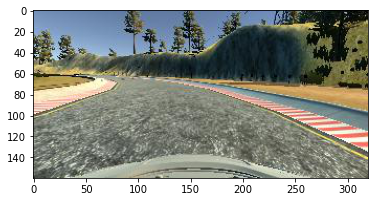

In [124]:
actual = "D:\pythonProject\Self-Driving-Car\Simulation Data\IMG\center_2022_03_10_15_03_39_406.jpg"
img = mpimg.imread(actual)
plt.imshow(img)

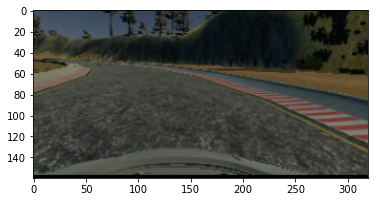

In [125]:
img, ster = augmentImage("D:\pythonProject\Self-Driving-Car\Simulation Data\IMG\center_2022_03_10_15_03_39_406.jpg",0)
plt.imshow(img)

In [126]:
def preProcess(img):
    img = img[60:135,:,:]
    img =cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,(3,3),0)
    img = cv2.resize(img,(200,66))
    img = img/255
    return img

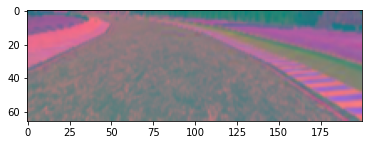

In [127]:
img = mpimg.imread(actual)
img = preProcess(img)
plt.imshow(img)

In [128]:
import random 

def batchGenerator(imagesPath, steeringList, batchSize, trainFlag):
    while True:
        imgBatch = []
        steeringBatch = []
        
        for i in range(batchSize):
            index = random.randint(0,imagesPath.shape[0]-1)
            if trainFlag:
                img, steering = augmentImage(imagesPath[index], steeringList[index])
            else:
                img = mpimg.imread(imagesPath[index])
                steering = steeringList[index]
            img = preProcess(img)
            imgBatch.append(img)
            steeringBatch.append(steering)
        yield(np.asarray(imgBatch), np.asarray(steeringBatch))
        

In [129]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [130]:
def createModel():
    model = Sequential()
    model.add(Convolution2D(24,(5,5),(2,2), input_shape=(66,200,3), activation='elu'))
    model.add(Convolution2D(36,(5,5),(2,2),  activation='elu'))
    model.add(Convolution2D(48,(5,5),(2,2),  activation='elu'))
    model.add(Convolution2D(64,(3,3),  activation='elu'))
    model.add(Convolution2D(64,(3,3),  activation='elu'))
    
    model.add(Flatten())
    model.add(Dense(100,activation='elu'))
    model.add(Dense(50,activation='elu'))
    model.add(Dense(10,activation='elu'))
    model.add(Dense(1))
    
    model.compile(Adam(learning_rate=0.0001),loss='mse')
    
    return model

In [131]:
model = createModel()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_18 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_19 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_20 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 flatten_3 (Flatten)         (None, 1152)              0         
                                                                 
 dense_12 (Dense)            (None, 100)              

In [144]:
history = model.fit(batchGenerator(X_train,y_train,100,1),steps_per_epoch=300,epochs=10,validation_data=batchGenerator(X_test,y_test,100,0),validation_steps=200)

Epoch 1/10
300/300 [==============================] - 217s 724ms/step - loss: 0.0693 - val_loss: 0.0657
Epoch 2/10
300/300 [==============================] - 214s 715ms/step - loss: 0.0649 - val_loss: 0.0645
Epoch 3/10
300/300 [==============================] - 221s 739ms/step - loss: 0.0629 - val_loss: 0.0613
Epoch 4/10
300/300 [==============================] - 218s 727ms/step - loss: 0.0585 - val_loss: 0.0565
Epoch 5/10
300/300 [==============================] - 213s 710ms/step - loss: 0.0554 - val_loss: 0.0537
Epoch 6/10
300/300 [==============================] - 205s 685ms/step - loss: 0.0525 - val_loss: 0.0519
Epoch 7/10
300/300 [==============================] - 227s 757ms/step - loss: 0.0507 - val_loss: 0.0541
Epoch 8/10
300/300 [==============================] - 220s 735ms/step - loss: 0.0497 - val_loss: 0.0597
Epoch 9/10
300/300 [==============================] - 211s 704ms/step - loss: 0.0482 - val_loss: 0.0505
Epoch 10/10
300/300 [==============================] - 183s 611m

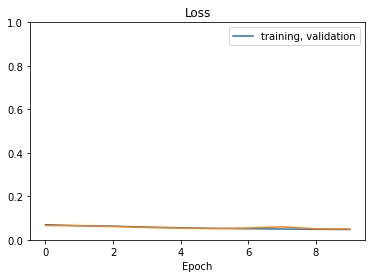

In [145]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["training, validation"])
plt.ylim([0,1])
plt.title("Loss")
plt.xlabel("Epoch")
plt.show()

In [146]:
model.save('model.h5')